In [1]:
import numpy as np
import matplotlib.pylab as plt

In [2]:
q = -1.6 * (10**(-19))
B = 0.4
m = 1.67 * (10**(-27))
w = (q*B)/m
v0 = 1.5 * (10**5)
theta = 0
v0x = -v0*np.sin(theta)
v0y = v0*np.cos(theta)

In [3]:
def RungeKuttaFourthOrderStep(x_old, y1_old, y2_old):
    
    k_1_prime1 = func_prime_1(x_old,y1_old, y2_old)
    k_1_prime2 = func_prime_2(x_old,y1_old, y2_old)
    
    #first step
    x1 = x_old + (dt/2.0)
    y1_1 = y1_old + (dt/2.0) * k_1_prime1
    y2_1 = y2_old + (dt/2.0) * k_1_prime2
    k_2_prime1 = func_prime_1(x1, y1_1, y2_1)
    k_2_prime2 = func_prime_2(x1, y1_1, y2_1)
    
    #second step
    x2 = x_old + (dt/2.0)
    y1_2 = y1_old + (dt/2.0) * k_2_prime1
    y2_2 = y2_old + (dt/2.0) * k_2_prime2
    k_3_prime1 = func_prime_1(x2, y1_2, y2_2)
    k_3_prime2 = func_prime_2(x2, y1_2, y2_2)
    
    
    #third
    x3 = x_old + dt
    y1_3 = y1_old + dt * k_3_prime1
    y2_3 = y2_old + dt * k_3_prime2
    k_4_prime1 = func_prime_1(x3, y1_3, y2_3)
    k_4_prime2 = func_prime_2(x3, y1_3, y2_3)
    
    #fourth step
    average_k_1 = (1.0/6.0)*(k_1_prime1 + 2.0*k_2_prime1 + 2.0*k_3_prime1 + k_4_prime1)
    average_k_2 = (1.0/6.0)*(k_1_prime2 + 2.0*k_2_prime2 + 2.0*k_3_prime2 + k_4_prime2)
    
    x_new = x_old + dt
    y_1_new = y1_old +dt* average_k_1
    y_2_new= y2_old +dt* average_k_2
    return x_new, y_1_new, y_2_new

In [4]:
dt=0.00000001
min_t = 0.0
max_t = 0.01
n_points = int((max_t-min_t)/dt)
t = np.zeros(n_points)
x = np.zeros(n_points)
vx = np.zeros(n_points)
y = np.zeros(n_points)
vy = np.zeros(n_points)

In [5]:
def func_prime_1(t, x, vx):
    return (v0x*np.cos(w*t))+(v0y*np.sin(w*t))

def func_prime_2(t, x, vx):
    return w*(-v0x*np.sin(w*t))+(v0y*np.cos(w*t))

t[0] = min_t
x[0] = 0.0
vx[0] = v0x   

for i in range(1,n_points):
    t[i],x[i],vx[i] = RungeKuttaFourthOrderStep(t[i-1], x[i-1], vx[i-1])

#plt.plot(t,x)

In [6]:
def func_prime_1(t, x, vx):
    return (v0y*np.cos(w*t))+(-v0x*np.sin(w*t))

def func_prime_2(t, x, vx):
    return w*(-v0y*np.sin(w*t))+(-v0x*np.cos(w*t))

t[0] = min_t
y[0] = 0.0
vy[0] = v0y  

for i in range(1,n_points):
    t[i],y[i],vy[i] = RungeKuttaFourthOrderStep(t[i-1], y[i-1], vy[i-1])

#plt.plot(t,y)

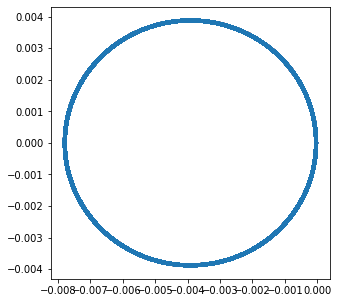

In [9]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

plt.figure(figsize=(5,5))
plt.plot(x,y)

In [7]:
q*B*np.min(x)/2

2.505018843843157e-22

In [8]:
m*v0

2.505e-22